In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix, recall_score, precision_score, classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import optuna
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [5]:
X = df.drop(['label'], axis=1)
y = df['label']

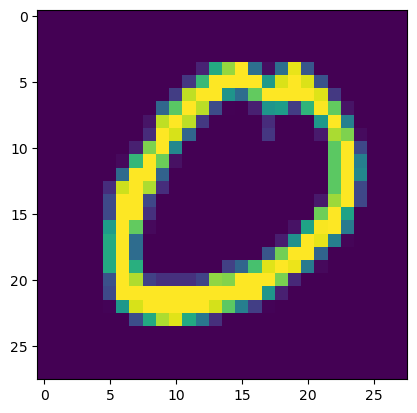

In [6]:
plt.imshow(X.iloc[13051].values.reshape(28,28))

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
pca = PCA(n_components = 225,random_state=42)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [11]:
print(X_train_trf.shape)

(33600, 225)


In [12]:
#The goal should be to atleast explain 90% variance in the data by your PCs.
np.cumsum(pca.explained_variance_ratio_*100)[-1]

90.17348162011365

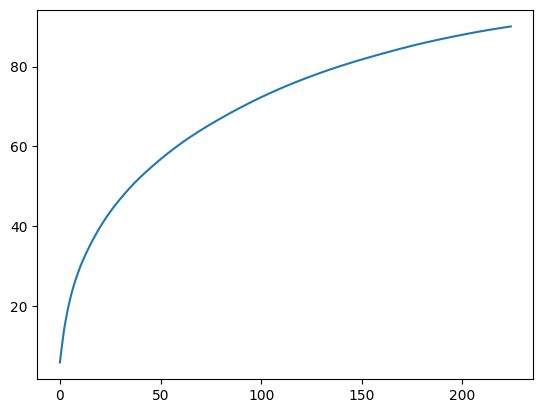

In [56]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

In [36]:
pca.components_.shape

(784, 784)

In [87]:
knn = KNeighborsClassifier().fit(X_train_trf, y_train)
y_pred = knn.predict(X_test_trf)
print(accuracy_score(y_test,y_pred))


0.9547619047619048


In [ ]:
maximum=0
components=0

for i in range(1,785):
    pca = PCA(n_components = i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier().fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy > maximum:
        maximum = accuracy
        components=i
        print(f"Accuracy:{maximum}")
        print(f"Components:{i}")        

In [77]:
print(maximum)


0.955595238095238
